In [1]:
#libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

<class 'numpy.ndarray'>


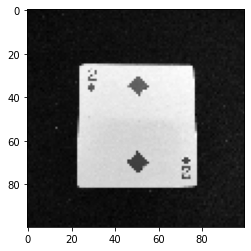

In [74]:
#preprocess the image
def preprocessing(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100))
    img = img / 255
    return img

img = cv2.imread('data/0.jpg')
img = preprocessing(img)
print(type(img))
plt.imshow(img, cmap='gray')

In [44]:
#loading data
path = 'data'
images = []
labels = []

for i in range(52):
    image = cv2.imread(path + '/' + str(i) + '.jpg')
    image = preprocessing(image)
    images.append(image)
    labels.append(i)

1
52


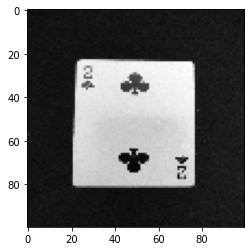

In [45]:
plt.imshow(images[1], cmap='gray')
print(labels[1])
print(len(images))

In [46]:
#data augmentation
from keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator(rotation_range = 90, 
                         brightness_range = (0.4, 1.),
                         width_shift_range = 0.13,
                         height_shift_range = 0.13,
                         shear_range=12.0,
                         zoom_range=0.3)

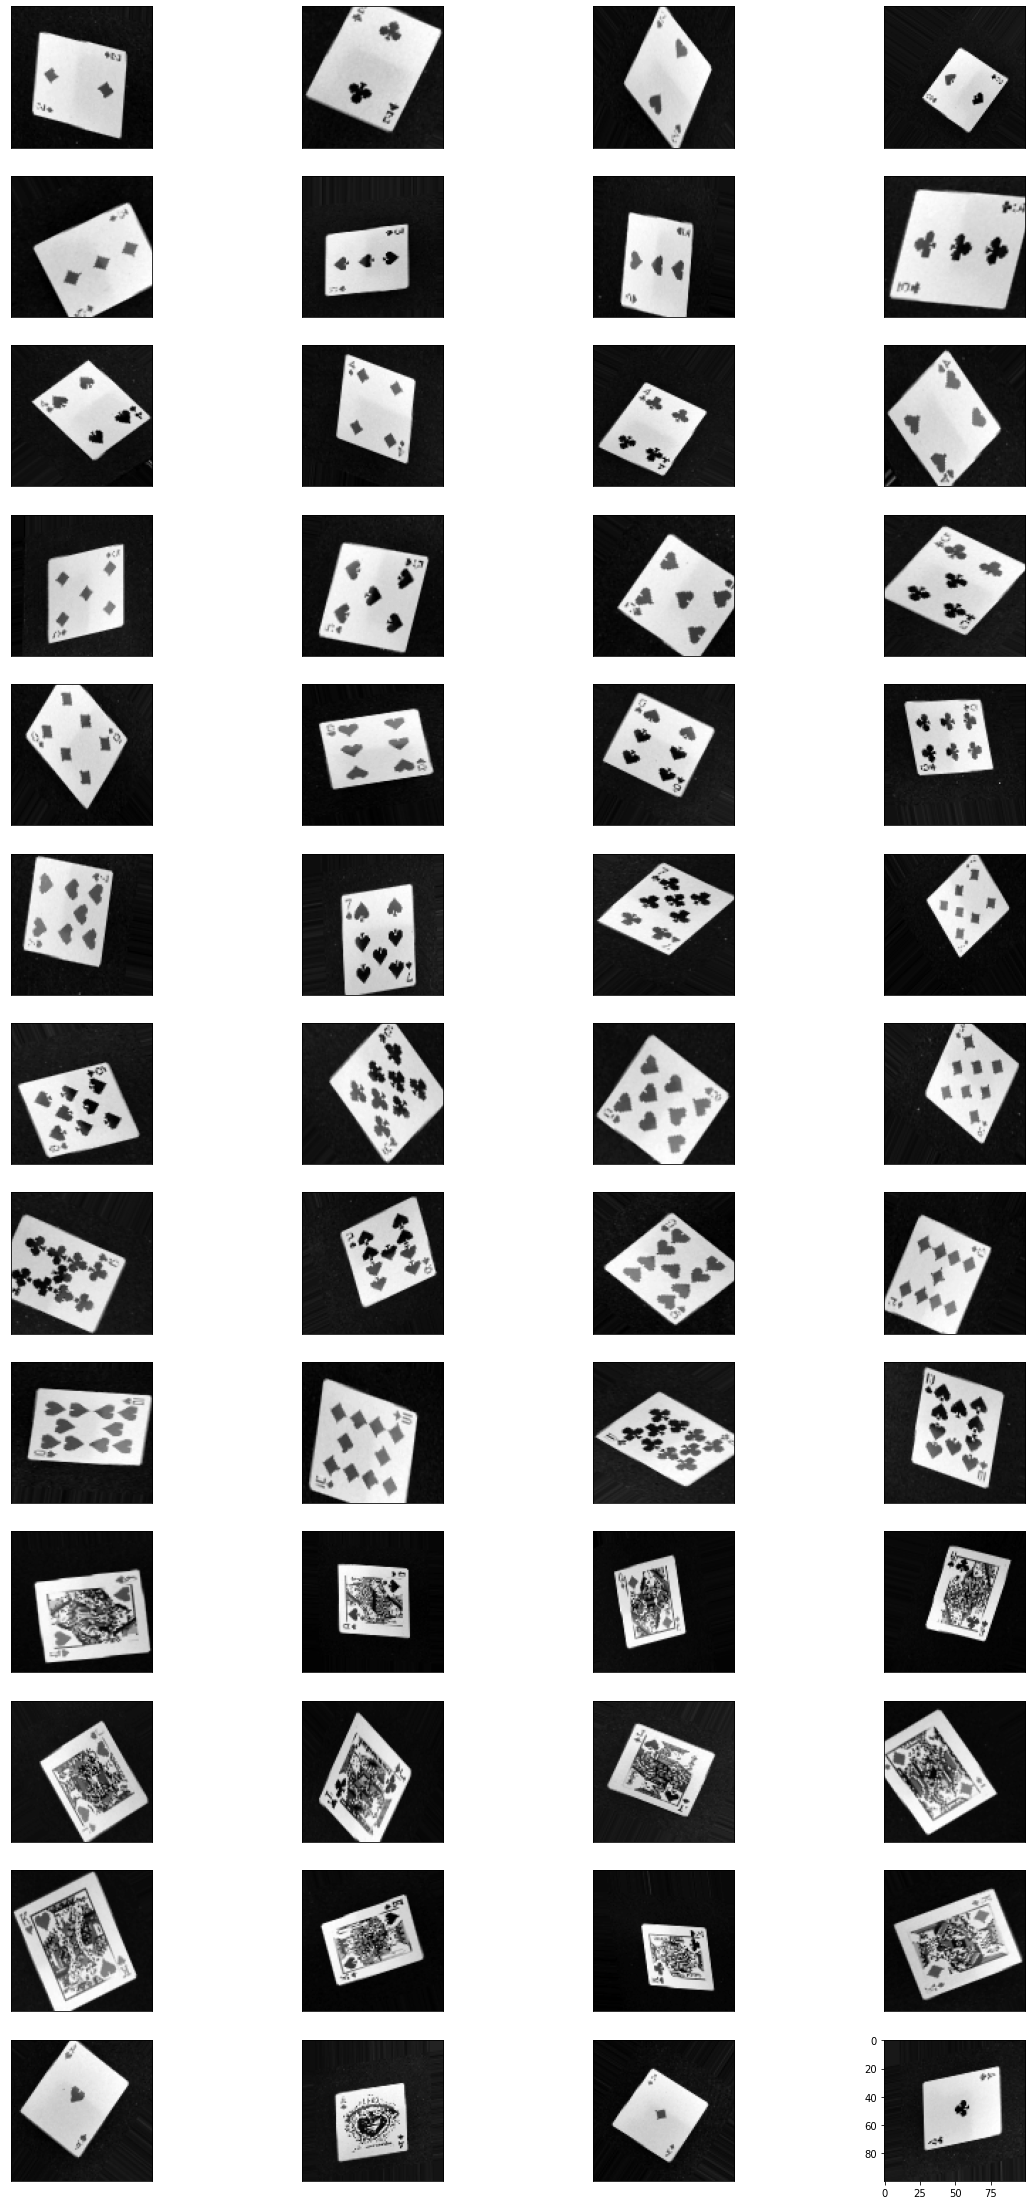

In [47]:
new_images = []
new_labels = []

plt.figure(figsize=(20, 40))
for i in range(len(images)):
    #oryginalne zdjecie
    new_images.append(images[i])
    new_labels.append(i)
    
    image = images[i]
    images_tmp_array = image.reshape((1, image.shape[0], image.shape[1], 1))
    gen.fit(images_tmp_array)
    gen_it = gen.flow(images_tmp_array)
    
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.subplot(13,4,i+1)
    #przykladowe nowe zdjecie
    new_image = gen_it.next()[0]/255
    plt.imshow(new_image, cmap='gray')
    
    #nowe zdjecia
    for j in range(500):
        new_image = gen_it.next()[0]/255
        new_image = new_image.reshape((new_image.shape[0], new_image.shape[1]))
        new_images.append(new_image)
        new_labels.append(i)
        
        #print(type(new_image), new_image.shape)

In [48]:
#ile mamy zdjec
images = np.array(new_images)
labels = np.array(new_labels)
print(images.shape)
print(labels.shape)

(26052, 100, 100)
(26052,)


In [50]:
print(labels[:150])
max(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


51

0
[[0.04313726 0.03137255 0.01960784 0.02352941 0.01568628]
 [0.03137255 0.04313726 0.03137255 0.01960784 0.01960784]
 [0.03137255 0.03529412 0.03921569 0.02745098 0.01960784]
 [0.03921569 0.02745098 0.04313726 0.03529412 0.02352941]
 [0.03529412 0.03921569 0.02745098 0.04313726 0.03137255]]


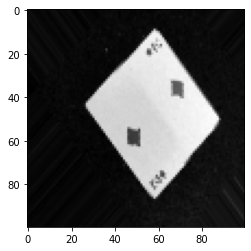

In [51]:
print(labels[3])
print(images[3][:5,:5])
plt.imshow(images[3], cmap = 'gray')

In [52]:
#splitting and shuffling data
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(images, labels, test_size = 0.2)

In [54]:
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)
min(train_y)

(20841, 100, 100) (20841,)
(5211, 100, 100) (5211,)


0

In [55]:
#splitting test for test and validation
test_x, valid_x, test_y, valid_y = train_test_split(test_x, test_y, test_size = 0.2)

In [57]:
print(test_x.shape, test_y.shape)
print(valid_x.shape, valid_y.shape)
max(train_y)

(4168, 100, 100) (4168,)
(1043, 100, 100) (1043,)


51

In [64]:
train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], train_x.shape[2], 1))
test_x = test_x.reshape((test_x.shape[0], test_x.shape[1], test_x.shape[2], 1))
valid_x = valid_x.reshape((valid_x.shape[0], valid_x.shape[1], valid_x.shape[2], 1))
print(train_x.shape, test_x.shape, valid_x.shape)

(20841, 100, 100, 1) (4168, 100, 100, 1) (1043, 100, 100, 1)


In [76]:
#tworzenie modelu
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Conv2D(64, (5,5), activation='relu', input_shape=(train_x.shape[1], train_x.shape[2], train_x.shape[3])),
    keras.layers.Conv2D(64, (5,5), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(52, activation='softmax')
])

In [78]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [83]:
import tensorflow
tensorflow.test.gpu_device_name()

''

In [79]:
model.fit(train_x, train_y, epochs=10, batch_size=32)

Epoch 1/10
 15/652 [..............................] - ETA: 19:24 - loss: 3.9605 - accuracy: 0.0188

KeyboardInterrupt: 